### Lab 1

#### Ньяти Каелиле БВТ2201

### Задание №1

In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def stage1_basic_calculation():
    t1_max, t1_min = 4, 1  # Arrival time range
    t2_max, t2_min = 4, 1  # Processing time range
    
    random.seed(42)  # For reproducibility
    
    # Generate 6 signals
    n_signals = 6
    
    # Generate arrival intervals t1
    t1_intervals = [(t1_max - t1_min) * random.random() + t1_min for _ in range(n_signals)]
    t1_intervals[0] = 0  # First signal at time 0
    
    # Calculate arrival moments T1 (cumulative sum)
    T1 = []
    cumsum = 0
    for t in t1_intervals:
        cumsum += t
        T1.append(cumsum)
    
    # Generate processing times t2
    #random.uniform(1,4)
    t2 = [(t2_max - t2_min) * random.random() + t2_min for _ in range(n_signals)]
    t2[0] = 0  # No processing for initial state
    
    print(f"Arrival moments T1: {[round(x, 3) for x in T1]}")
    print(f"Processing times t2: {[round(x, 3) for x in t2]}")
    
    # Build timing diagram and calculate processed signals
    processed = 0
    current_time = 0
    processing_end = 0
    
    print("\n--- Timing Diagram Analysis ---")
    for i in range(1, n_signals):  # Skip first (t=0)
        arrival = T1[i]
        
        if arrival >= processing_end:
            # Signal can be processed
            processed += 1
            processing_end = arrival + t2[i]
            print(f"Signal {i}: Arrival={arrival:.3f}, Processed, End={processing_end:.3f}")
        else:
            # Signal rejected (system busy)
            print(f"Signal {i}: Arrival={arrival:.3f}, REJECTED (busy until {processing_end:.3f})")
    
    probability = processed / (n_signals - 1)  # Exclude t=0
    print(f"\nProcessed: {processed}/{n_signals-1}")
    print(f"Probability P = {probability:.3f}")
    
    return T1, t2, probability

T1, t2, prob = stage1_basic_calculation()

###PREPARE TEST FOR TESTING COMPUTER PROGRAM

Arrival moments T1: [0, 1.075, 2.9, 4.57, 7.779, 10.809]
Processing times t2: [0, 1.261, 2.266, 1.089, 1.656, 2.516]

--- Timing Diagram Analysis ---
Signal 1: Arrival=1.075, Processed, End=2.336
Signal 2: Arrival=2.900, Processed, End=5.166
Signal 3: Arrival=4.570, REJECTED (busy until 5.166)
Signal 4: Arrival=7.779, Processed, End=9.435
Signal 5: Arrival=10.809, Processed, End=13.325

Processed: 4/5
Probability P = 0.800


### Задание №2

In [20]:
class QueueingSystem:
    """
    Single-server queuing system simulation
    Input flow: uniform distribution [1,4]
    Processing time: uniform distribution [1,4]
    """
    
    def __init__(self, num_signals=1000):
        self.min_val = 1
        self.max_val = 4
        self.num_signals = num_signals
        self.processed = 0
        self.rejected = 0
        self.total = 0
        
    def generate_uniform(self):
        """Generate uniform random value in range [1,4]"""
        return self.min_val + (self.max_val - self.min_val) * random.random()
    
    def simulate(self):
        """Run simulation"""
        current_time = 0
        server_free_at = 0
        
        arrival_times = []
        processing_times = []
        
        # First signal at time 0
        arrival_times.append(0)
        processing_times.append(0)  # No processing for first signal
        
        # Generate remaining signals
        for i in range(1, self.num_signals):
            # Time until next arrival (uniform [1,4])
            inter_arrival = self.generate_uniform()
            current_time += inter_arrival
            arrival_times.append(current_time)
            
            # Processing time (uniform [1,4])
            proc_time = self.generate_uniform()
            processing_times.append(proc_time)
        
        # Process signals (skip first)
        for i in range(1, self.num_signals):
            arrival = arrival_times[i]
            proc_time = processing_times[i]
            
            if arrival >= server_free_at:
                self.processed += 1
                server_free_at = arrival + proc_time
            else:
                self.rejected += 1
        
        self.total = self.num_signals - 1  # Exclude first signal
        return self.processed / self.total
    
    def get_stats(self):
        return {
            'processed': self.processed,
            'rejected': self.rejected,
            'total': self.total,
            'probability': self.processed / self.total
        }


def stage2_simulation():
    print("\n" + "=" * 60)
    print("STAGE 2: Simulation Program (Assignment #2)")
    print("=" * 60)
    
    # Run multiple experiments
    n_experiments = 10
    n_signals = 6  # Match Stage 1
    probabilities = []
    
    print(f"\nUniform distribution [1,4]")
    print(f"Running {n_experiments} experiments with {n_signals} signals each:\n")
    
    for exp in range(n_experiments):
        random.seed(42 + exp)  # Different seed, but first experiment matches Stage 1
        qs = QueueingSystem(num_signals=n_signals)
        prob = qs.simulate()
        probabilities.append(prob)
        stats = qs.get_stats()
        print(f"Exp {exp+1}: P={prob:.3f} ({stats['processed']}/{stats['total']})")
    
    print(f"\nMean probability: {np.mean(probabilities):.3f}")
    print(f"Std deviation: {np.std(probabilities):.3f}")
    
    return probabilities

# Run Stage 2
probs = stage2_simulation()


STAGE 2: Simulation Program (Assignment #2)

Uniform distribution [1,4]
Running 10 experiments with 6 signals each:

Exp 1: P=1.000 (5/5)
Exp 2: P=0.600 (3/5)
Exp 3: P=1.000 (5/5)
Exp 4: P=0.600 (3/5)
Exp 5: P=0.600 (3/5)
Exp 6: P=0.800 (4/5)
Exp 7: P=1.000 (5/5)
Exp 8: P=0.600 (3/5)
Exp 9: P=0.800 (4/5)
Exp 10: P=0.800 (4/5)

Mean probability: 0.780
Std deviation: 0.166


### Задание №3

In [21]:
def generate_uniform(min_val=1, max_val=4):
    """Uniform distribution [min_val, max_val]"""
    return min_val + (max_val - min_val) * random.random()

def simulate_queue(Tz, Ts, num_signals=10000, seed=None):
    """
    Simulate single-server queue
    Tz: mean arrival interval (uniform [0, 2*Tz] or parameterized)
    Ts: mean processing time (uniform [0, 2*Ts] or parameterized)
    """
    if seed is not None:
        random.seed(seed)
    
    # For the graphs, we need to vary the ranges based on Tz and Ts
    # Arrival: uniform [0, 2*Tz] -> mean = Tz
    # Processing: uniform [0, 2*Ts] -> mean = Ts
    
    current_time = 0
    server_free_at = 0
    processed = 0
    
    for i in range(num_signals):
        # Inter-arrival time: uniform [0, 2*Tz]
        inter_arrival = 2 * Tz * random.random()
        current_time += inter_arrival
        
        # Processing time: uniform [0, 2*Ts]
        proc_time = 2 * Ts * random.random()
        
        if current_time >= server_free_at:
            processed += 1
            server_free_at = current_time + proc_time
    
    return processed / num_signals



STAGE 3a: Figure 1 - Processing Intensity Dependency
Tz=10: P ranges 0.580 to 0.983
Tz=4: P ranges 0.313 to 0.958
Tz=1.33: P ranges 0.126 to 0.860


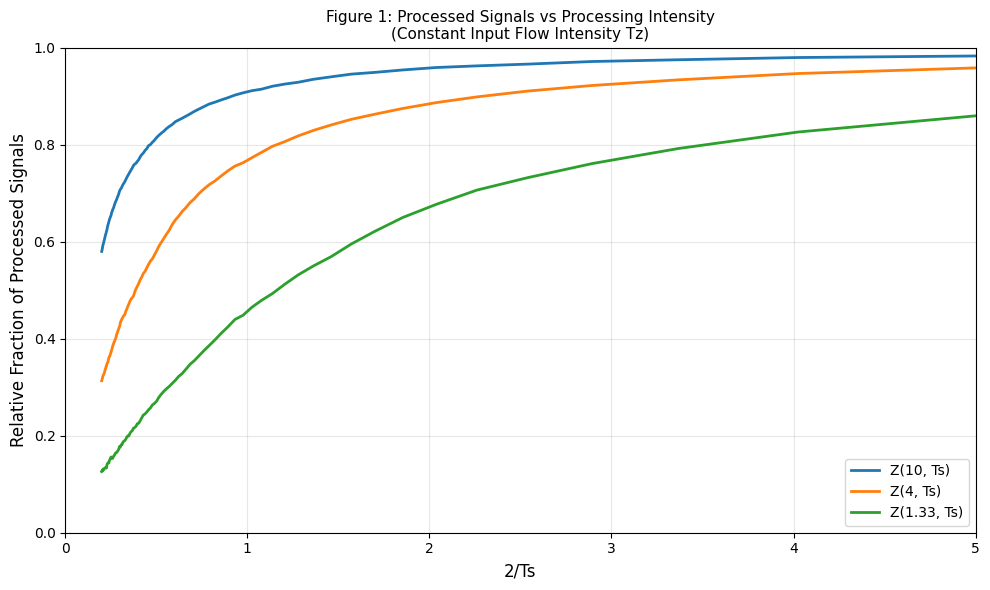

Saved: figure1_corrected.png


In [ ]:
# Z vs 2/Ts (processing intensity) for fixed Tz values

def stage3a_figure1():
    """
    Figure 1: Dependency on processing intensity
    X-axis: 2/Ts (processing intensity)
    Y-axis: Relative fraction of processed signals
    Curves for Tz = 10, 4, 1.33 (constant)
    """
    print("\n" + "=" * 60)
    print("STAGE 3a: Figure 1 - Processing Intensity Dependency")
    print("=" * 60)
    
    Tz_values = [10, 4, 1.33]  # Fixed arrival means
    # 2/Ts ranges from ~0 to 5, so Ts ranges from ~0.4 to infinity
    # Practical range: Ts from 0.4 to 10
    Ts_range = np.linspace(0.4, 10, 100)
    
    plt.figure(figsize=(10, 6))
    
    for Tz in Tz_values:
        probs = []
        for Ts in Ts_range:
            prob = simulate_queue(Tz, Ts, num_signals=5000, seed=42)
            probs.append(prob)
        
        x_axis = 2 / Ts_range  # This is 2/Ts
        plt.plot(x_axis, probs, label=f'Z(10, Ts)' if Tz == 10 else f'Z({Tz}, Ts)', 
                linewidth=2)
        
        print(f"Tz={Tz}: P ranges {min(probs):.3f} to {max(probs):.3f}")
    
    plt.xlabel('2/Ts', fontsize=12)
    plt.ylabel('Relative Fraction of Processed Signals', fontsize=12)
    plt.title('Figure 1: Processed Signals vs Processing Intensity\n'
              '(Constant Input Flow Intensity Tz)', fontsize=11)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 5)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.savefig('figure1_corrected.png', dpi=150)
    plt.show()
    print("Saved: figure1_corrected.png")

# Run all stages
if __name__ == "__main__":
    stage3a_figure1()


STAGE 3b: Figure 2 - Input Flow Intensity Dependency
Ts=10: P ranges 0.041 to 0.580
Ts=4: P ranges 0.091 to 0.815
Ts=1.33: P ranges 0.251 to 0.942


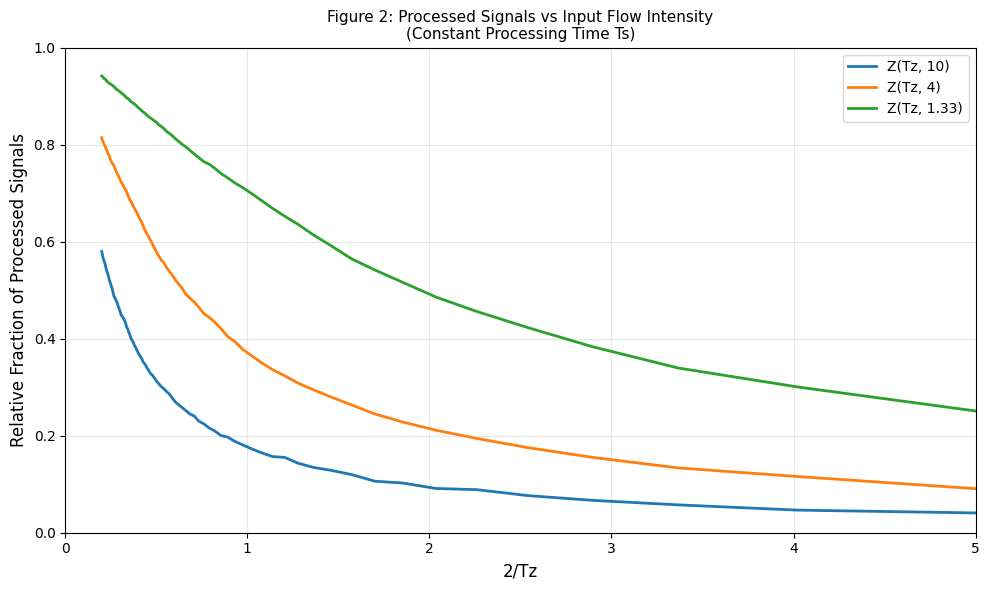

Saved: figure2_corrected.png


In [23]:
# ==================== STAGE 3b: Figure 2 ====================
# Z vs 2/Tz (input flow intensity) for fixed Ts values

def stage3b_figure2():
    """
    Figure 2: Dependency on input flow intensity  
    X-axis: 2/Tz (input flow intensity)
    Y-axis: Relative fraction of processed signals
    Curves for Ts = 10, 4, 1.33 (constant)
    """
    print("\n" + "=" * 60)
    print("STAGE 3b: Figure 2 - Input Flow Intensity Dependency")
    print("=" * 60)
    
    Ts_values = [10, 4, 1.33]  # Fixed processing means
    Tz_range = np.linspace(0.4, 10, 100)
    
    plt.figure(figsize=(10, 6))
    
    for Ts in Ts_values:
        probs = []
        for Tz in Tz_range:
            prob = simulate_queue(Tz, Ts, num_signals=5000, seed=42)
            probs.append(prob)
        
        x_axis = 2 / Tz_range  # This is 2/Tz
        plt.plot(x_axis, probs, label=f'Z(Tz, 10)' if Ts == 10 else f'Z(Tz, {Ts})',
                linewidth=2)
        
        print(f"Ts={Ts}: P ranges {min(probs):.3f} to {max(probs):.3f}")
    
    plt.xlabel('2/Tz', fontsize=12)
    plt.ylabel('Relative Fraction of Processed Signals', fontsize=12)
    plt.title('Figure 2: Processed Signals vs Input Flow Intensity\n'
              '(Constant Processing Time Ts)', fontsize=11)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 5)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.savefig('figure2_corrected.png', dpi=150)
    plt.show()
    print("Saved: figure2_corrected.png")
    
if __name__ == "__main__":
    stage3b_figure2()
  


STAGE 3c: Figure 3 - System Load Coefficient Dependency
Tz=10: P ranges 0.178 to 0.958
Tz=4: P ranges 0.178 to 0.958
Tz=1.33: P ranges 0.178 to 0.958


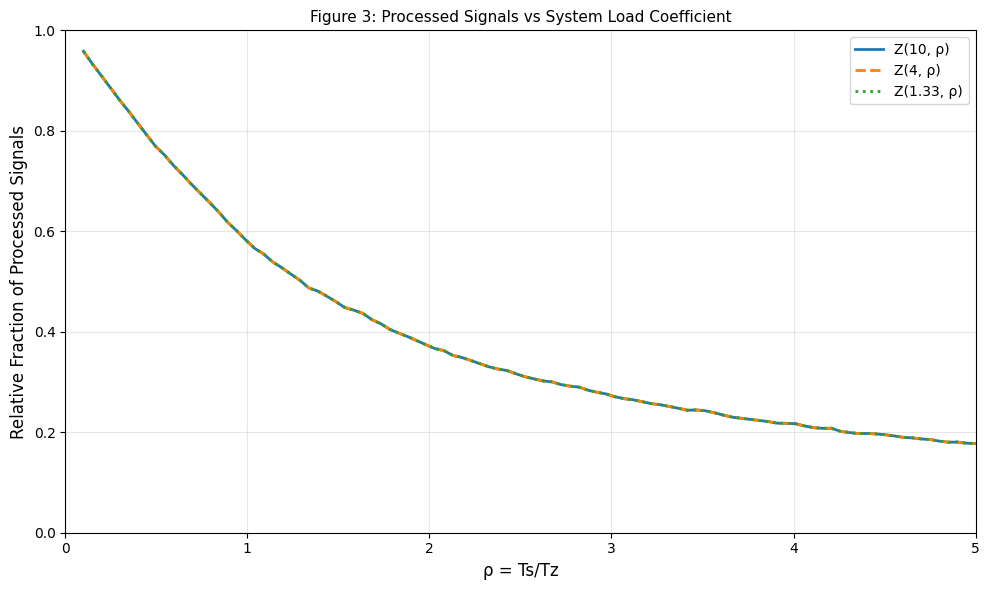

Saved: figure3_corrected.png


In [24]:
# ==================== STAGE 3c: Figure 3 ====================
# Z vs ρ (load coefficient) where ρ = Ts/Tz

def stage3c_figure3():
    """
    Figure 3: Dependency on system load coefficient
    X-axis: ρ = Ts/Tz (load coefficient)
    Y-axis: Relative fraction of processed signals
    Curves for Tz = 10, 4, 1.33
    """
    print("\n" + "=" * 60)
    print("STAGE 3c: Figure 3 - System Load Coefficient Dependency")
    print("=" * 60)
    
    Tz_values = [10, 4, 1.33]
    rho_range = np.linspace(0.1, 5, 100)  # ρ from 0.1 to 5
    
    plt.figure(figsize=(10, 6))
    
    for Tz in Tz_values:
        probs = []
        for rho in rho_range:
            Ts = rho * Tz  # Since ρ = Ts/Tz, then Ts = ρ * Tz
            prob = simulate_queue(Tz, Ts, num_signals=5000, seed=42)
            probs.append(prob)
        
        # Line styles matching original figure
        if Tz == 10:
            style = '-'
        elif Tz == 4:
            style = '--'
        else:
            style = ':'
            
        plt.plot(rho_range, probs, label=f'Z(10, ρ)' if Tz == 10 else f'Z({Tz}, ρ)',
                linestyle=style, linewidth=2)
        
        print(f"Tz={Tz}: P ranges {min(probs):.3f} to {max(probs):.3f}")
    
    plt.xlabel('ρ = Ts/Tz', fontsize=12)
    plt.ylabel('Relative Fraction of Processed Signals', fontsize=12)
    plt.title('Figure 3: Processed Signals vs System Load Coefficient', fontsize=11)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 5)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.savefig('figure3_corrected.png', dpi=150)
    plt.show()
    print("Saved: figure3_corrected.png")
    
if __name__ == "__main__":
    stage3c_figure3()